# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 2
# Notebook #4: Regresión lineal validando con k-folding

## Integrantes del grupo
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín

# 1. Cargando base de datos

In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [16]:
import importlib

In [32]:
import matplotlib.pyplot as plt

In [17]:
import sys

In [18]:
sys.path.insert(0, '../..')

In [19]:
# Read the database from the .csv file into a pandas dataframe
df = pd.read_csv('../../databases/insurance.csv')

# 2. Preprocesamiento de los datos

In [20]:
from sklearn import preprocessing

In [40]:
from src import helper
importlib.reload(helper);

## 2.1. Codificación de variables no numéricas

In [22]:
# Create a label encoder for the sex variable or feature and create a new column in the dataframe 
# with the encoded version of the gender
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(df['sex'])
df['sex-encoded'] = sex_encoder.transform(df['sex'])

In [23]:
# Create a label encoder for the smoker variable or feature and create a new column in the dataframe
# with the encoded version of the smoker
smoker_encoder = preprocessing.LabelEncoder()
smoker_encoder.fit(df['smoker'])
df['smoker-encoded'] = smoker_encoder.transform(df['smoker'])

In [24]:
# Create a one hot encoder and fit the available types of regions in the dataset
region_encoder = preprocessing.OneHotEncoder()
region_encoder.fit(df['region'].to_numpy().reshape(-1, 1))

# Transform all entries into the one hot encoded representation
encoded_regions = region_encoder.transform(df['region'].to_numpy().reshape(-1, 1)).toarray()

# Add each new encoded variable or feature to the dataset
for i, category in enumerate(region_encoder.categories_[0]):
    df[f'{category}-encoded'] = encoded_regions.transpose()[i]

## 2.2. Eliminando outliers

In [25]:
# Remove outliers by setting NaN on those rows at the column of BMI
helper.remove_outliers(df, 'bmi')

# Remove NaN values from the dataframe
df = df.dropna()

## 2.3. Filtrado de variables

In [26]:
# Filtering or removing of non desired variables
df_x = df[['age', 'bmi', 'smoker-encoded', 'children', 'sex-encoded', 'northwest-encoded', 'northeast-encoded', 'southwest-encoded', 'southeast-encoded']]
df_y = df['charges']

# 3. Regresión Lineal y K-Folding

In [27]:
from src.ej2 import rl_helper
importlib.reload(rl_helper);

In [35]:
## Run model experiment
train_maes, valid_maes, test_maes = rl_helper.run_model_with_kfold(df_x, df_y, test_size=0.2, n_splits=8, random_state=20,
                                                                   learning_rate=1000,
                                                                   degree=2,
                                                                   scheduler='exponential-decay',
                                                                   decay_rate=0.09,
                                                                   optimizer='adam',
                                                                   beta_1=0.9,
                                                                   beta_2=0.99,
                                                                   patience=50,
                                                                   min_delta=5,
                                                                   epochs=1000,
                                                                   batch_size=64,
                                                                   tag='kfold',
                                                                   tensorboard_on=False,
                                                                   summary_on=False
                                                                  )

# Inform results
mae_train = round(train_maes.mean(), 2)
mae_valid = round(valid_maes.mean(), 2)
mae_test = round(test_maes.mean(), 2)
print(f'[MAE] Train: {mae_train} Valid: {mae_valid} Test: {mae_test}')

[MAE] Train: 1822.07 Valid: 1881.28 Test: 2520.99


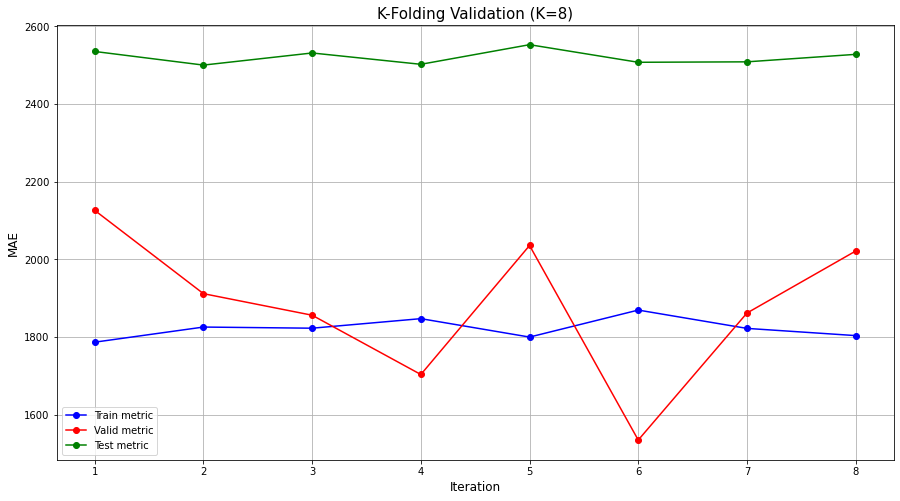

In [41]:
helper.plot_kfold_metrics(train_maes, valid_maes, test_maes)